In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('framingham.csv')
data.head(n=10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [3]:
data.shape

(4240, 16)

In [4]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
#data['education'] = data['education'].replace(0,NA)
#data['cigsPerDay'] = data['cigsPerDay'].replace(0, NA)
#data['BPMeds'] = data['BPMeds'].replace(0, NA)
#data['totChol'] = data['totChol'].replace(0, NA)
#data['BMI'] = data['BMI'].replace(0, NA)
#data['glucose'] = data['glucose'].replace(0,NA)
data.dropna(how = "any" ,inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB


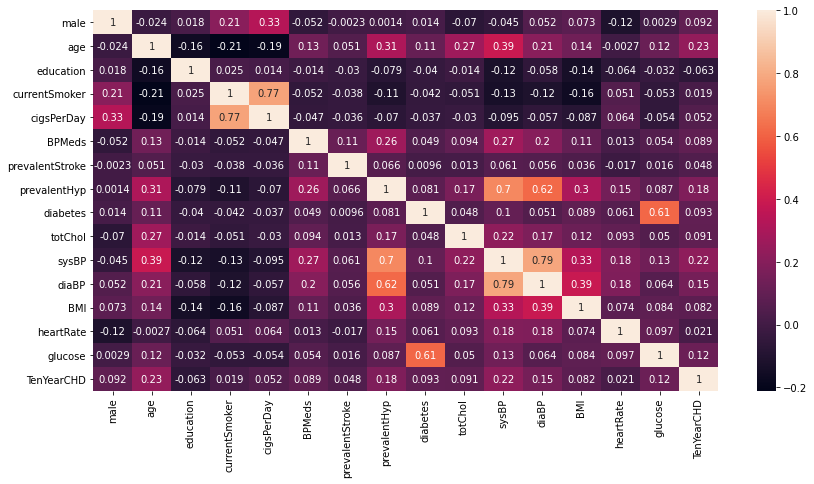

In [7]:
plt.figure(figsize=(14,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

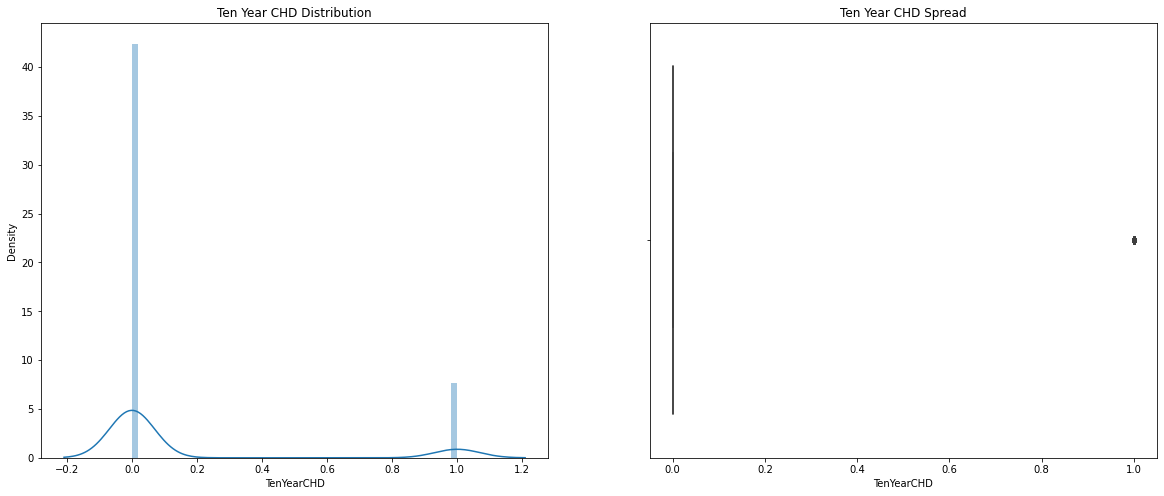

In [8]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Ten Year CHD Distribution')
sns.distplot(data.TenYearCHD)

plt.subplot(1,2,2)
plt.title('Ten Year CHD Spread')
sns.boxplot(data.TenYearCHD)
plt.show()

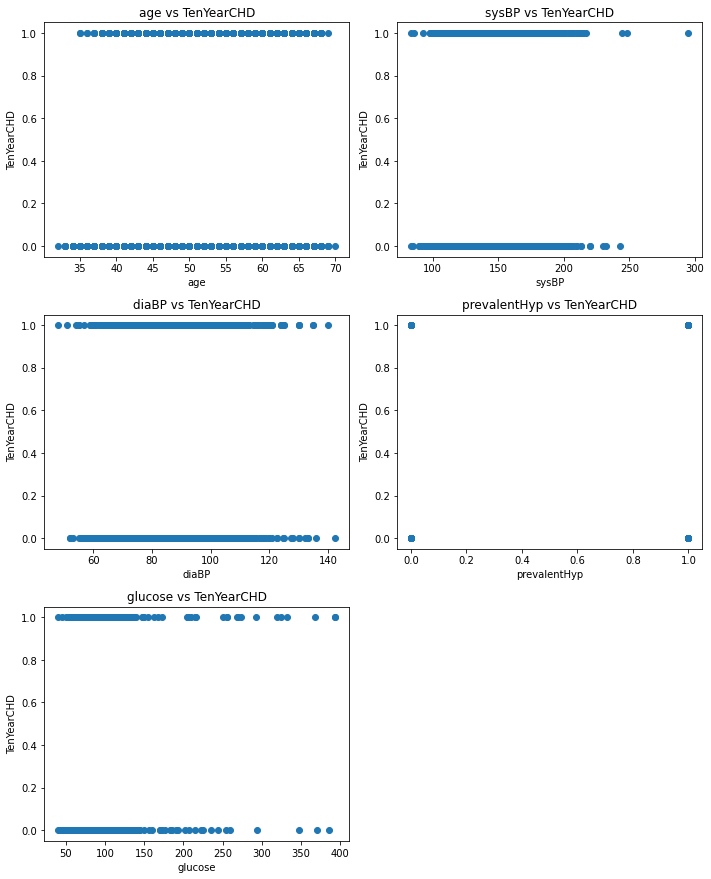

In [9]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(data[x],data['TenYearCHD'])
    plt.title(x+' vs TenYearCHD')
    plt.ylabel('TenYearCHD')
    plt.xlabel(x)
    
plt.figure(figsize=(10,20))

scatter('age',1)
scatter('sysBP',2)
scatter('diaBP',3)
scatter('prevalentHyp',4)
scatter('glucose',5)

plt.tight_layout()

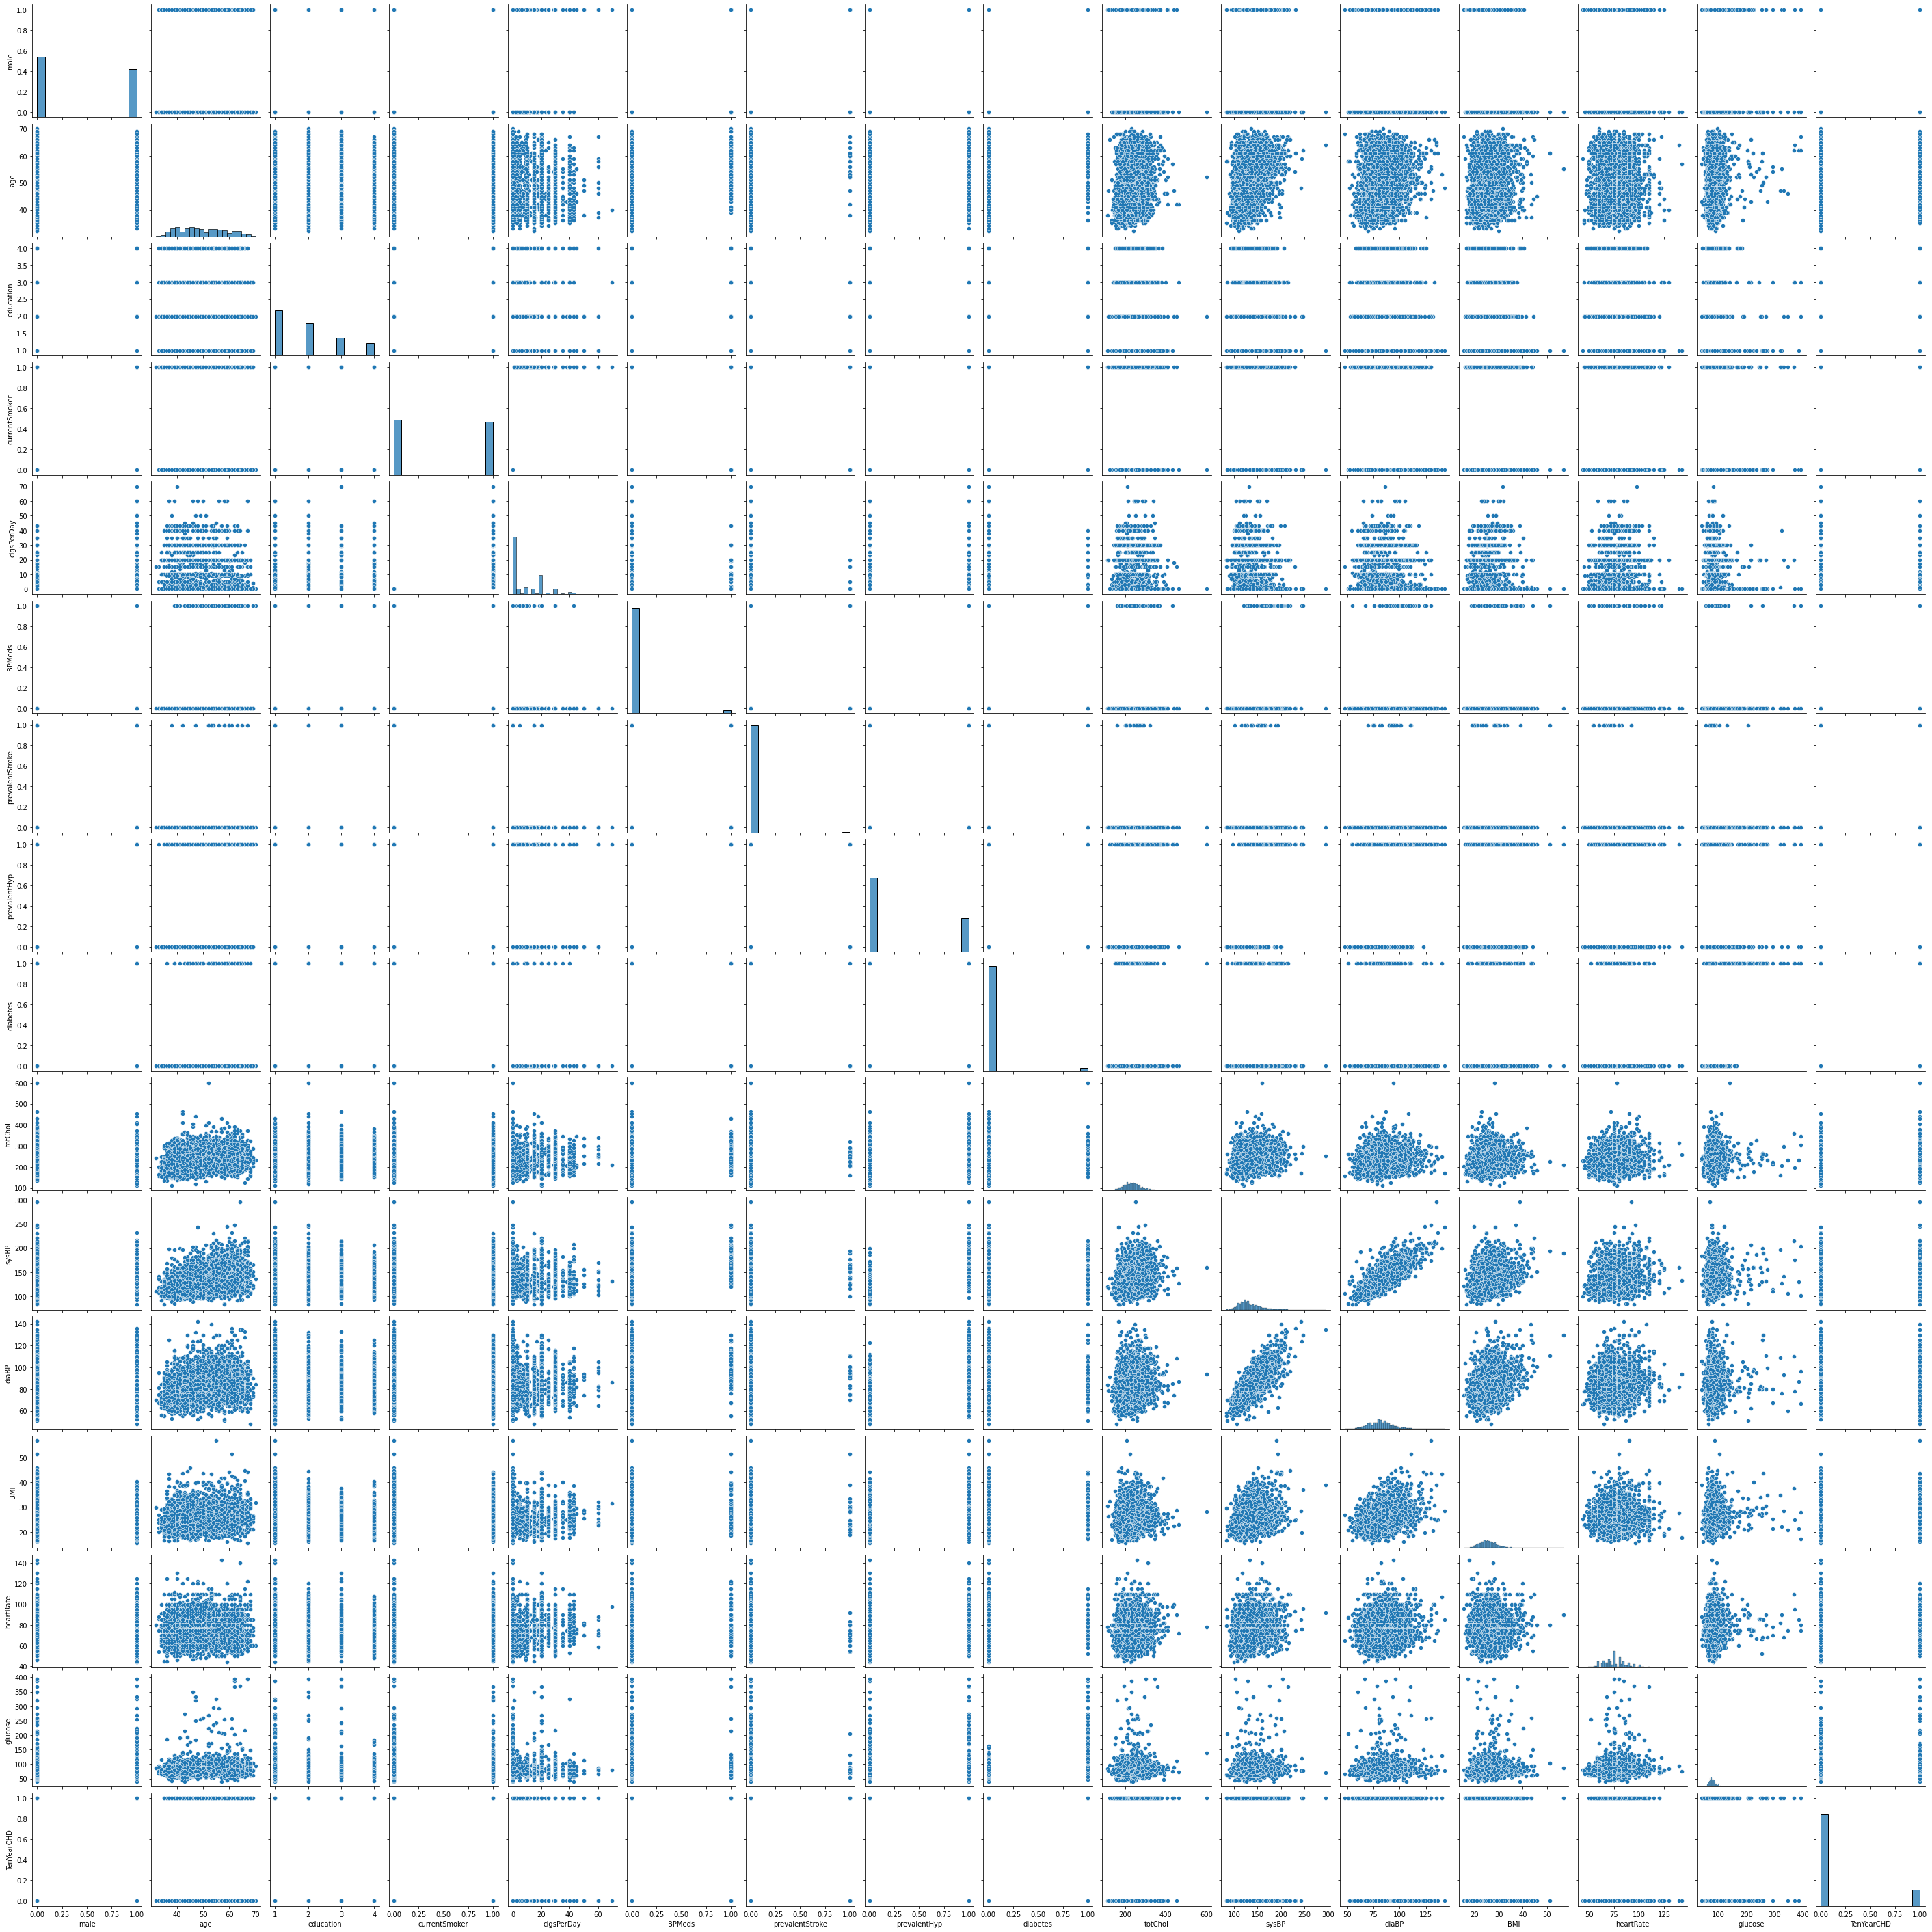

In [10]:
sns.pairplot(data)
plt.show()

In [11]:
X = data.drop('TenYearCHD',axis=1)
y = data['TenYearCHD']

In [12]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [13]:
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv= 5)
print(scores)

[0.05823945 0.06197179 0.13151468 0.1094817  0.04258569]


In [14]:
model=model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [15]:
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error: ', MSE)
print('R2 Score: ', r2)

Mean squared error:  0.12132826637831585
R2 Score:  0.0985885226116453


In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model_1=make_pipeline(StandardScaler(),LinearRegression())
model_1.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [17]:
model_1.score(X_test,y_test)

0.0985885226116453

In [18]:
y_pred=model_1.predict(X_test)
mean_absolute_error(y_test,y_pred)

0.23558848998171059

In [19]:
from sklearn.ensemble import RandomForestRegressor
model2 = make_pipeline(StandardScaler(),RandomForestRegressor())

In [20]:
model2.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [21]:
model2.score(X_test,y_test)

0.05025354713074359